In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
from tensorflow.keras.models import load_model


In [2]:
beer_data= pd.read_csv("Consumo_cerveja.csv")

In [3]:
beer_data.isnull().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [53]:
beer_data.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [54]:
beer_data.describe()

,Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000
mean,0.284932,25.401367
std,0.452001,4.399143
min,0.000000,14.343000
25%,0.000000,22.008000
50%,0.000000,24.867000
75%,1.000000,28.631000
max,1.000000,37.937000


In [55]:
beer_data.isna().any()

Data                           True
Temperatura Media (C)          True
Temperatura Minima (C)         True
Temperatura Maxima (C)         True
Precipitacao (mm)              True
Final de Semana                True
Consumo de cerveja (litros)    True
dtype: bool

In [56]:
beer_data.dropna(how='all',inplace=True)

In [57]:
beer_data.replace({',':'.'},regex=True, inplace=True)

In [58]:
beer_data['Data'] = pd.to_datetime(beer_data['Data'])
print(beer_data['Data'])

0     2015-01-01
1     2015-01-02
2     2015-01-03
3     2015-01-04
4     2015-01-05
         ...    
360   2015-12-27
361   2015-12-28
362   2015-12-29
363   2015-12-30
364   2015-12-31
Name: Data, Length: 365, dtype: datetime64[ns]


In [59]:
beer_data.info()
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    object        
 2   Temperatura Minima (C)       365 non-null    object        
 3   Temperatura Maxima (C)       365 non-null    object        
 4   Precipitacao (mm)            365 non-null    object        
 5   Final de Semana              365 non-null    float64       
 6   Consumo de cerveja (litros)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 22.8+ KB


In [60]:
beer_data['Day']=beer_data['Data'].apply(lambda a: days[a.weekday()])

In [61]:
beer_data.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Day
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461,Thursday
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972,Friday
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814,Saturday
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,Sunday
4,2015-01-05,23.82,21,28.3,0,0.0,28.900,Monday


<Axes: xlabel='Day', ylabel='Consumo de cerveja (litros)'>

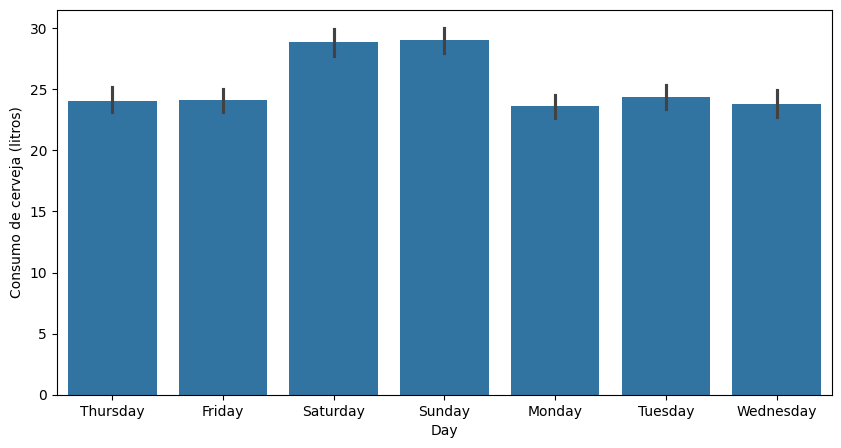

In [62]:
plt.figure(figsize=(10,5))
sns.barplot(x="Day", y= "Consumo de cerveja (litros)", data=beer_data)

In [63]:
beer_data.drop(['Data','Day'], axis=1, inplace=True)

In [64]:
# Split features and target
X = beer_data.drop(columns=["Consumo de cerveja (litros)"])
y = beer_data['Consumo de cerveja (litros)']


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=5,validation_split=0.2, verbose=1)


Epoch 1/100


c:\Users\Priyanka\anaconda3\envs\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 653.0359 - val_loss: 529.9213
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 577.4177 - val_loss: 451.7408
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 484.1180 - val_loss: 354.1514
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 373.5642 - val_loss: 247.8915
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 273.5193 - val_loss: 155.0757
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 164.1933 - val_loss: 91.4174
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 108.2958 - val_loss: 58.8445
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 68.6375 - val_loss: 43.4898
Epoch 9/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 55.3698 - val_loss: 35.7215
Epoch 10/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 45.3725 - val_loss: 29.3171
Epoch 11/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35.5075 - val_loss: 24.6028
Epoch 12/100
47/47 ━━━━━━━━━━━━━━━━━━━━

In [69]:

# Build the refined neural network model
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.2),  # Dropout layer to reduce overfitting
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),  # Another dropout layer
    layers.Dense(64, activation='relu'),
    layers.Dense(18, activation='relu'),
    layers.Dropout(0.2),  # Another dropout layer
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with validation split
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=5, validation_split=0.2, verbose=1)

Epoch 1/200


c:\Users\Priyanka\anaconda3\envs\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 610.8813 - val_loss: 53.1010
Epoch 2/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 85.2150 - val_loss: 38.1840
Epoch 3/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 49.2049 - val_loss: 21.9110
Epoch 4/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.2372 - val_loss: 40.1242
Epoch 5/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.6465 - val_loss: 26.9017
Epoch 6/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17.7523 - val_loss: 25.1856
Epoch 7/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16.0964 - val_loss: 25.6953
Epoch 8/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.7973 - val_loss: 42.9943
Epoch 9/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.9536 - val_loss: 31.0918
Epoch 10/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17.1223 - val_loss: 19.4669
Epoch 11/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16.1349 - val_loss: 27.7629
Epoch 12/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

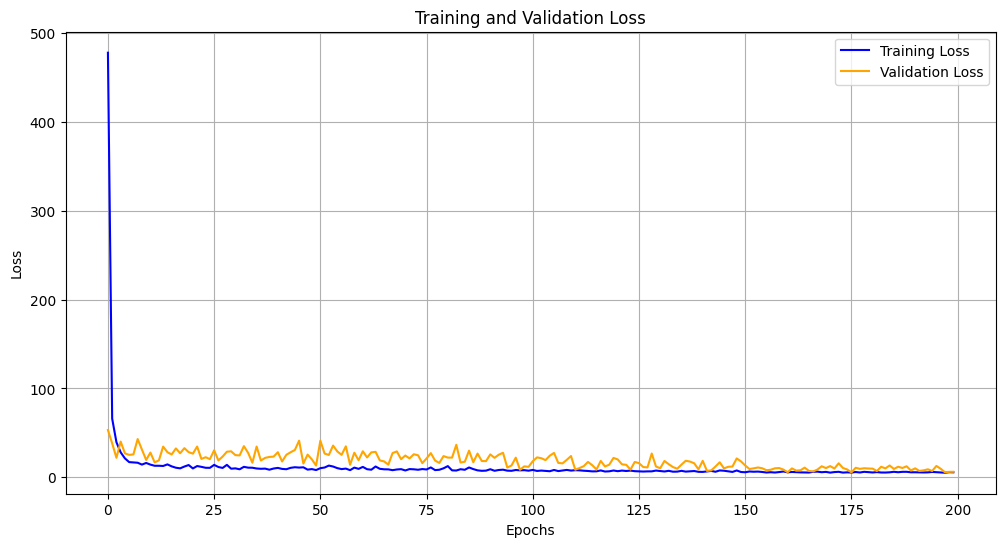

In [72]:

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [73]:
# Make predictions
predictions = model.predict(X_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Mean Absolute Error (MAE): 2.081089999682283
Mean Squared Error (MSE): 6.0985007729413026
R-squared (R²): 0.7247854433063059


In [76]:
# Save the model and scaler
model.save('beer_consumption_model.h5')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [81]:
# Load the saved model and scaler
model = load_model('beer_consumption_model.h5')
scaler = joblib.load('scaler.pkl')

In [82]:
# Function to predict beer consumption based on custom input
def predict_consumo(temperatura_media, temperatura_minima, temperatura_maxima, precipitacao, final_de_semana):
    # Create a DataFrame for the input
    input_data = pd.DataFrame({
        "Temperatura Media (C)": [temperatura_media],
        "Temperatura Minima (C)": [temperatura_minima],
        "Temperatura Maxima (C)": [temperatura_maxima],
        "Precipitacao (mm)": [precipitacao],
        "Final de Semana": [final_de_semana]
    })
    
    # Scale the input data
    input_scaled = scaler.transform(input_data)
    
    # Make a prediction
    prediction = model.predict(input_scaled)
    
    return prediction[0][0]  # Return the predicted value


In [83]:

# Example usage of the prediction function
custom_prediction = predict_consumo(28.0, 24.0, 33.0, 5, 1)
print("Predicted beer consumption (liters):", custom_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted beer consumption (liters): 32.396454
